## Idea: Use structural similarity index to compare images against image solution

Students may have a correct graph, with:
1. Customized labels
2. Added title
3. Different color scheme

In DSF and ML, we typically don't change the default color scheme (blue/orange/green). If we do, we use a monochromatic scheme (ex: "Blues") or a more accessible scheme (ex: "viridis"). If students change the colors, it would probably be to one of these.

Initial testing suggests SSIM > 0.9 captures typical student deviations from the expected plot.

skimage contains multiple metrics for measuring similarity/difference between two images: https://scikit-image.org/docs/stable/api/skimage.metrics.html
- Not all metrics will be useful. Ex: MSE does not have a defined range, so a single cutoff doesn't make sense.

Testing idea:
1. Use images from current DSF and ML zyLabs
2. Make a list of expected customizations from DSF and ML content (What do we show students how to do? If they do all those changes, is SSIM > 0.9?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
import cv2

/Users/aimee/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


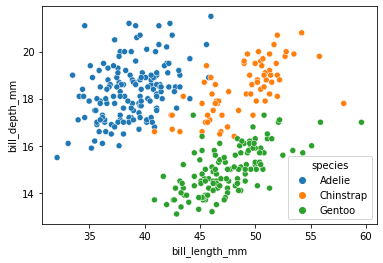

In [3]:
image1 = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.savefig("image1.png")

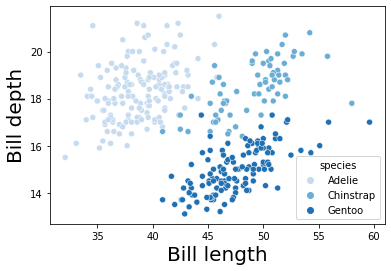

In [4]:
image2 = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", 
                        palette="Blues")
image2.set_xlabel("Bill length", fontsize=20)
image2.set_ylabel("Bill depth", fontsize=20)
plt.savefig("image2.png")

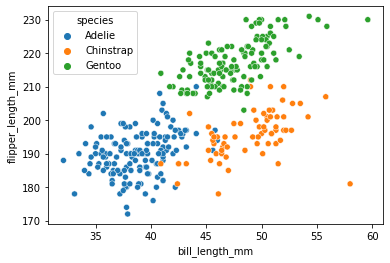

In [5]:
image3 = sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species")
plt.savefig("image3.png")

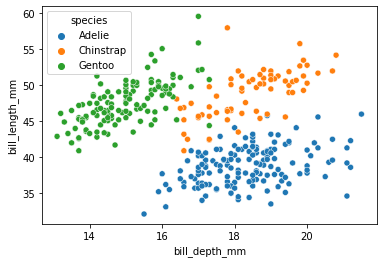

In [6]:
image4 = sns.scatterplot(data=penguins, x="bill_depth_mm", y="bill_length_mm", hue="species")
plt.savefig("image4.png")

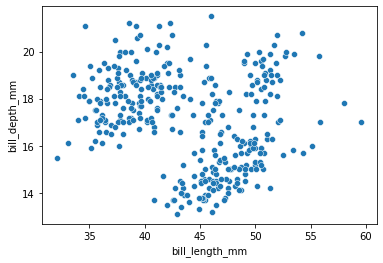

In [7]:
image5 = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.savefig("image5.png")

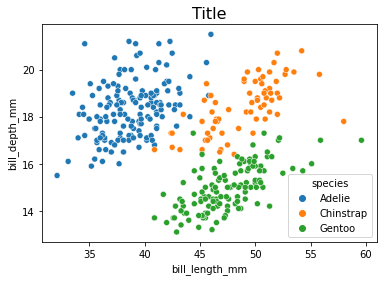

In [8]:
image6 = sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
image6.set_title("Title", fontsize=16)
plt.savefig("image6.png")

In [9]:
def compare_images(imageA, imageB, title):
    # compute the structural similarity index for the images
    s = ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("SSIM: %.2f" % (s), fontsize=16)
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

In [10]:
default = cv2.imread("image1.png")
edits = cv2.imread("image2.png")
# convert the images to grayscale
default = cv2.cvtColor(default, cv2.COLOR_BGR2GRAY)
edits = cv2.cvtColor(edits, cv2.COLOR_BGR2GRAY)

### Custom axis labels and color scheme: SSIM = 0.93

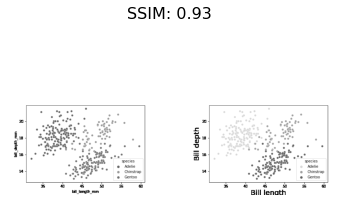

In [11]:
compare_images(default, edits, "Comparison")

### x and y are correct, but hue is missing: SSIM = 0.92
Default plot colors are all midrange, so converting to greyscale doesn't help as much. 

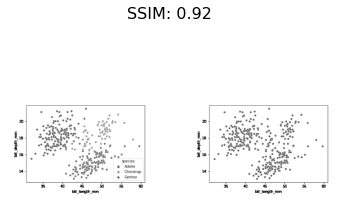

In [12]:
default = cv2.imread("image1.png")
edits = cv2.imread("image5.png")
# convert the images to grayscale
default = cv2.cvtColor(default, cv2.COLOR_BGR2GRAY)
edits = cv2.cvtColor(edits, cv2.COLOR_BGR2GRAY)
compare_images(default, edits, "Comparison")

### Correct x feature and hue, but incorrect y feature: SSIM = 0.63

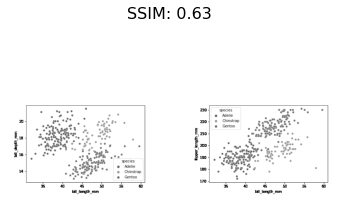

In [13]:
default = cv2.imread("image1.png")
edits = cv2.imread("image3.png")
# convert the images to grayscale
default = cv2.cvtColor(default, cv2.COLOR_BGR2GRAY)
edits = cv2.cvtColor(edits, cv2.COLOR_BGR2GRAY)
compare_images(default, edits, "Comparison")

### x and y features are switched: SSIM = 0.64

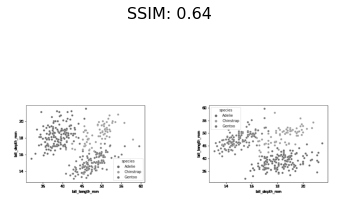

In [14]:
default = cv2.imread("image1.png")
edits = cv2.imread("image4.png")
# convert the images to grayscale
default = cv2.cvtColor(default, cv2.COLOR_BGR2GRAY)
edits = cv2.cvtColor(edits, cv2.COLOR_BGR2GRAY)
compare_images(default, edits, "Comparison")

### Correct code, with added title: SSIM = 0.99

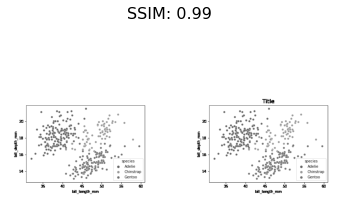

In [15]:
default = cv2.imread("image1.png")
edits = cv2.imread("image6.png")
# convert the images to grayscale
default = cv2.cvtColor(default, cv2.COLOR_BGR2GRAY)
edits = cv2.cvtColor(edits, cv2.COLOR_BGR2GRAY)
compare_images(default, edits, "Comparison")